In [22]:
import numpy as np
from scipy import linalg, stats
import matplotlib.pyplot as plt
import gaussproc as gp

In [23]:
interval = (-1,2)
grid_size = 101

kernel_param = 1
explore_param = 0.1

max_error = 1e-5
max_iter = 15

In [24]:
def func(x):
    return -np.sin(3*x) - x**2 + 0.7*x

In [25]:
points_vector = np.array([-0.7,2.0])
func_vector = func(points_vector)

grid = np.linspace(*interval,grid_size)
post_means = np.zeros_like(grid)
post_vars = np.zeros_like(grid)

acquisition_func = np.zeros_like(grid)

prev_max = -np.infty
curr_max = np.max(func_vector)

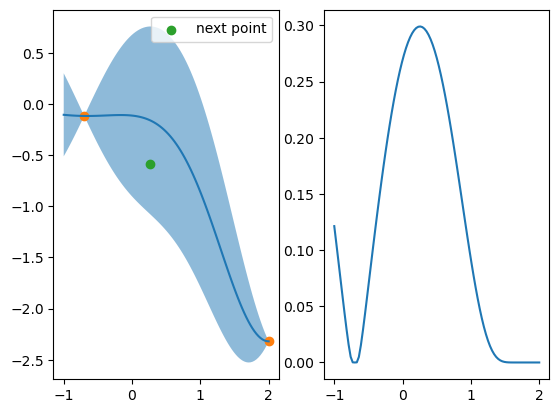

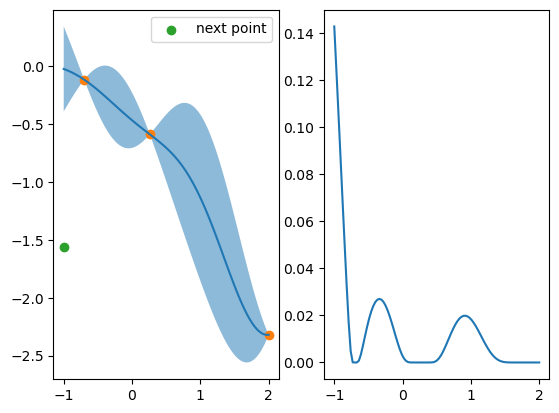

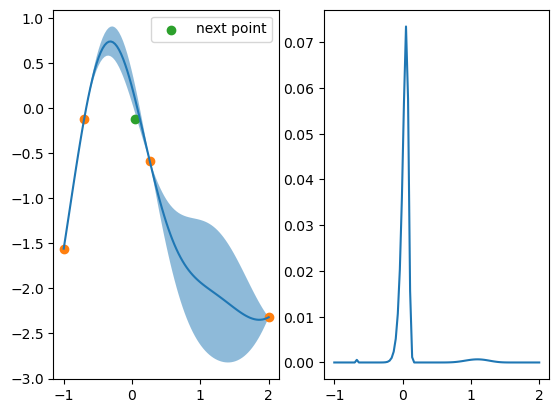

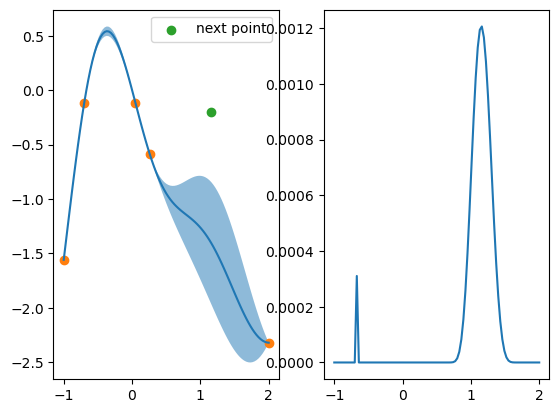

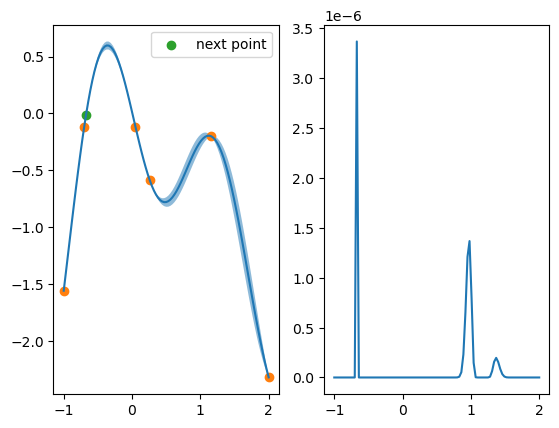

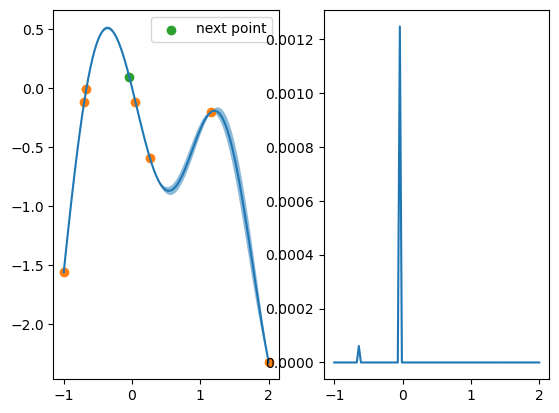

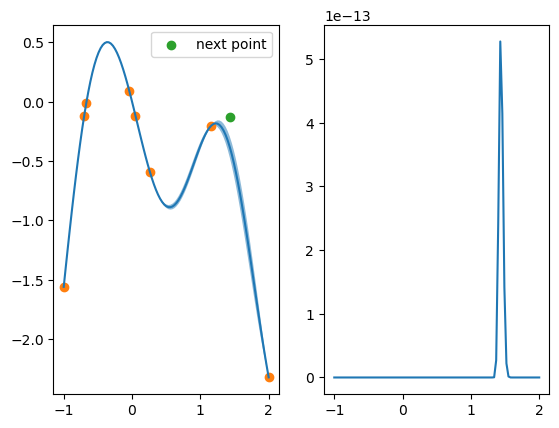

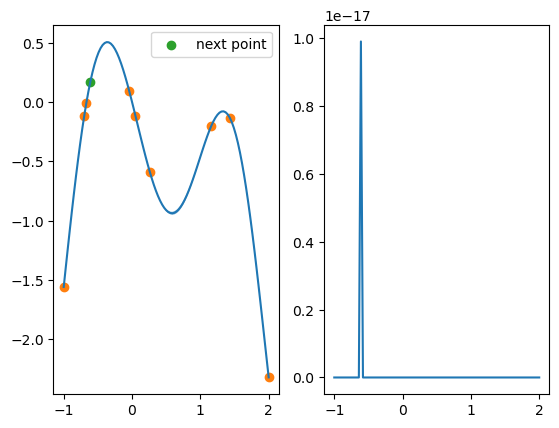

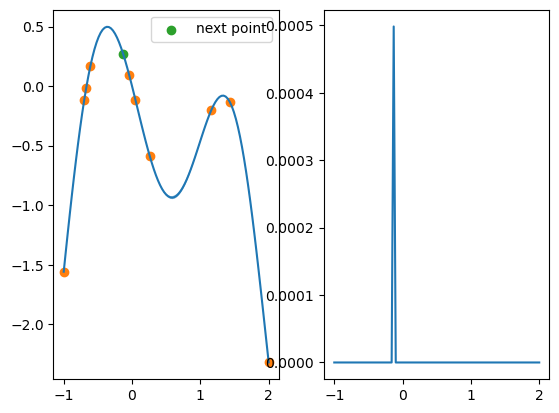

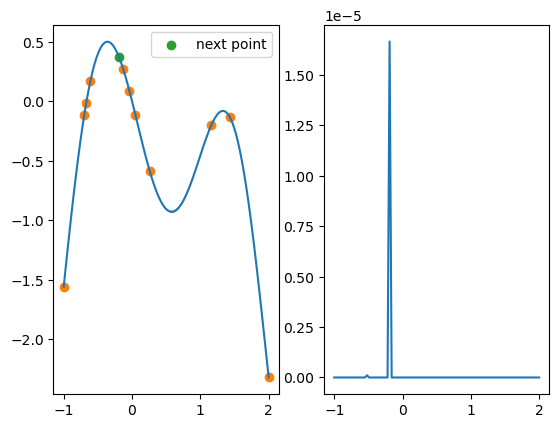

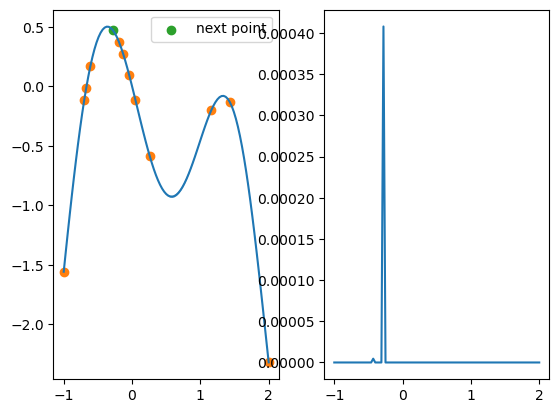

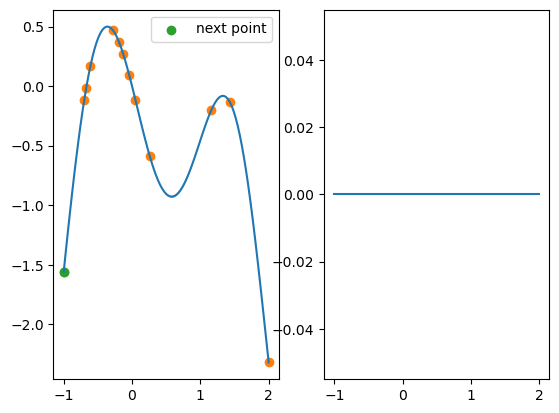

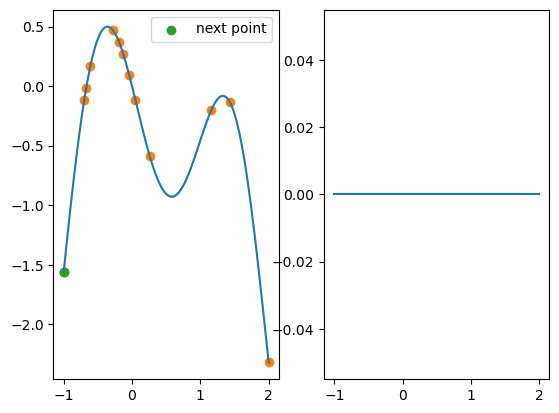

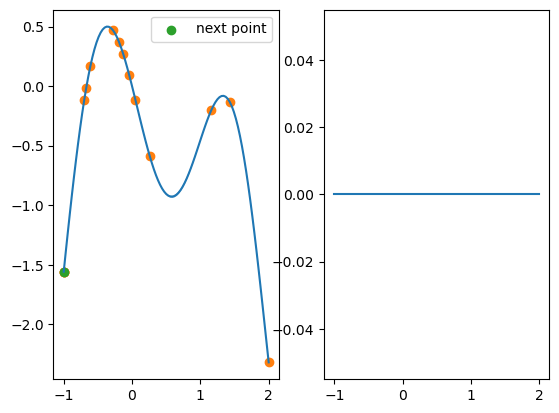

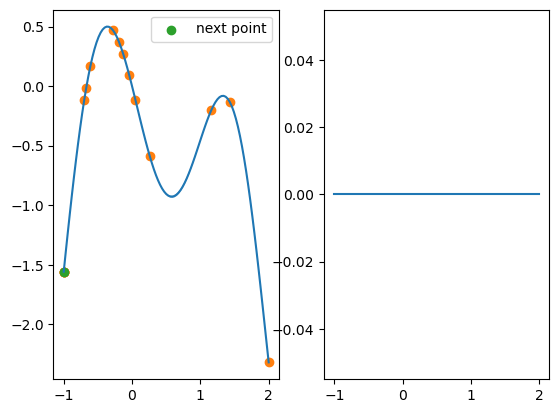

In [26]:
for _ in range(max_iter):
    if np.abs(curr_max-prev_max) <= max_error:
        break

    cov_mat = gp.cov_matrix(points_vector,kernel_param)

    for i,p in enumerate(grid):
        post_means[i] = gp.post_mean(p,points_vector,func_vector,cov_mat,kernel_param)
        post_vars[i] = gp.post_var(p,points_vector,cov_mat,kernel_param)

    post_vars = np.abs(post_vars)
    post_stds = np.sqrt(post_vars)
    for i,(post_mean,post_std) in enumerate(zip(post_means,post_stds)):
        acquisition_func[i] = gp.expected_improvement(post_mean,post_std,curr_max,explore_param)

    next_point = grid[np.argmax(acquisition_func)]
    next_value = func(next_point)

    f, ax = plt.subplots(1,2)

    ax[0].fill_between(grid, post_means-post_stds, post_means+post_stds,alpha=0.5)
    ax[0].plot(grid,post_means)
    ax[0].scatter(points_vector,func_vector)
    ax[0].scatter(next_point,next_value,label="next point")
    ax[0].legend()

    ax[1].plot(grid,acquisition_func)

    if next_value > curr_max:
        prev_max = curr_max
        curr_max = next_value

    points_vector = np.append(points_vector,next_point)
    func_vector = np.append(func_vector,next_value)

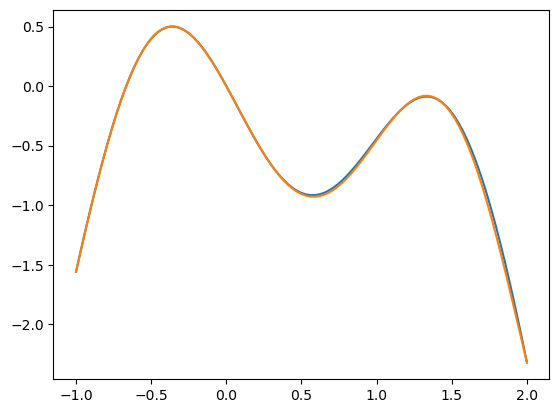

In [27]:
plt.plot(grid,func(grid))
plt.plot(grid,post_means)

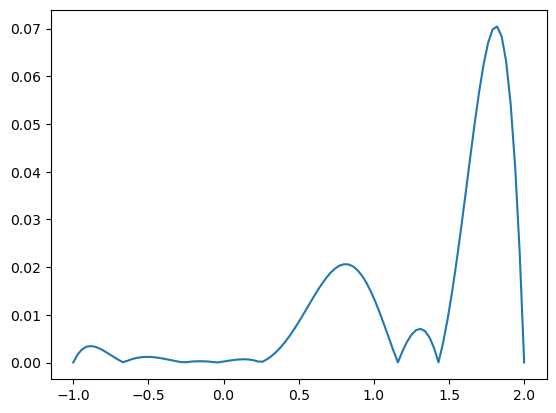

In [28]:
plt.plot(grid,np.abs(func(grid)-post_means))